# **Comparison of *SpalartAllmaras* and *wmSpalartAllmaras* model for skin friction at the wall**

In [1]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# increase dpi and use latex rendering
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 160
mpl.rc('text', usetex=True)

# Set macro for paths
run = "../run/"

In [2]:
UInf = 69.4
nuInf = 1.388e-05

model_sa = "SpalartAllmaras"
model_wmsa = "wmSpalartAllmaras"
yp = ['0.05', '1', '2', '5', '10', '30', '50', '100']
res_list = ['1e-5']

In [3]:
tauw_path = [run + 'turbulentFlatPlate_SA/yplus_{}/tauw_{}_{}_{}.csv'.format(yp[j], model_sa, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data = [pd.read_csv(tauw_path[i + len(res_list)*j], delim_whitespace=True) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data[0].head()

,ccx,tau_xx,tau_yy,tau_zz
0,0.000486,-48.3374,-0.943654,0
1,0.001458,-21.1201,-0.004816,0
2,0.002433,-16.4140,-0.000939,0
3,0.003410,-14.7323,-0.000377,0
4,0.004390,-13.8445,-0.000209,0


In [4]:
tauw_path_sa = [run + 'turbulentFlatPlate_wmSA/yplus_{}/tauw_{}_{}_{}.csv'.format(yp[j], model_wmsa, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_sa = [pd.read_csv(tauw_path_sa[i + len(res_list)*j], delim_whitespace=True) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_sa[0].head()

,ccx,tau_xx,tau_yy,tau_zz
0,0.000486,-48.3464,-0.948005,0
1,0.001458,-21.1164,-0.004790,0
2,0.002433,-16.4133,-0.000938,0
3,0.003410,-14.7323,-0.000377,0
4,0.004390,-13.8445,-0.000209,0


In [5]:
x0 = 0
Rex = (tauw_data_sa[0]['ccx'] - x0)*UInf/nuInf
Cf = [np.sqrt(tauw_data[i + len(res_list)*j]['tau_xx']**2 + tauw_data[i + len(res_list)*j]['tau_yy']**2 + tauw_data[i + len(res_list)*j]['tau_zz']**2)/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]
Cf_sa = [np.sqrt(tauw_data_sa[i + len(res_list)*j]['tau_xx']**2 + tauw_data_sa[i + len(res_list)*j]['tau_yy']**2 + tauw_data_sa[i + len(res_list)*j]['tau_zz']**2)/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]

In [6]:
wieghardt = 0.288*(np.log10(Rex))**(-2.45)

### Plot

From y+ = 5, there is noticeably a difference between two models. However, for the small y+ values, their behavior seems to be the same although the *nut* value is fixed for the *wmSpalartAllmaras* model. The reason might be as follows:
1. As per *Spalding's law*, the behavior is linear for very small *y* (less than 1e-5 [m]). In this case, there is no difference between the original cell center velocity and the integral based velocity. Therefore, the function *calcNut* consequently sends the same *uTau* value.

There are still discrepancies of *Cf* among the different y+ values, but the graph patterns are similar and there is no more giggling.

In C++ code, *this->nut_* only saves cell center values. However, the integral fitting method calculates cell face values. Therefore, this plot is based on the cell center values which is calculated from two adjacent cell face values by averaging method.

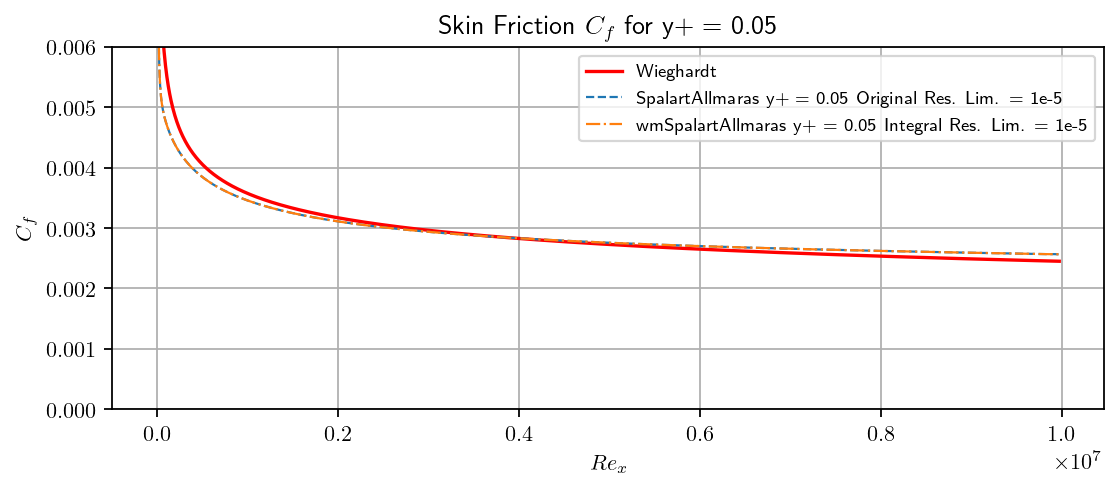

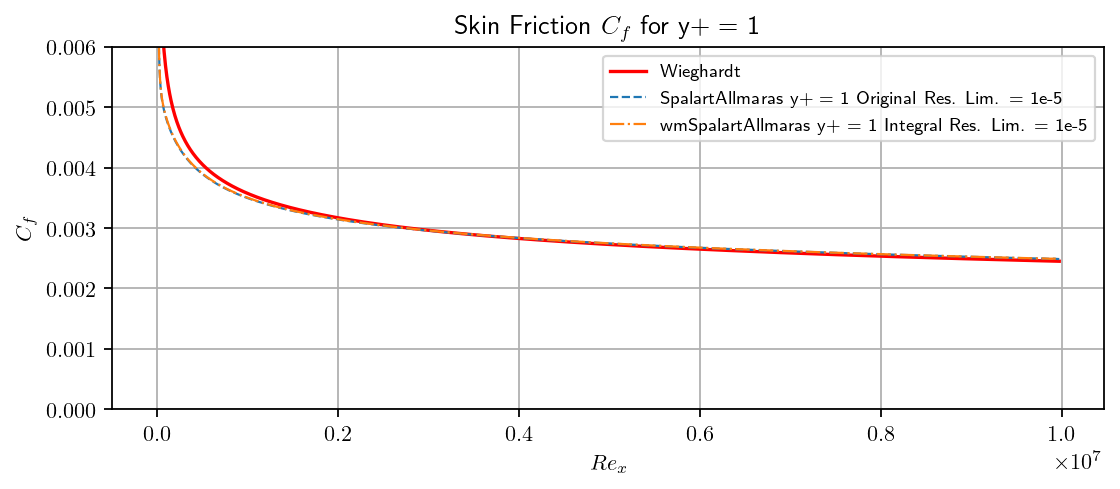

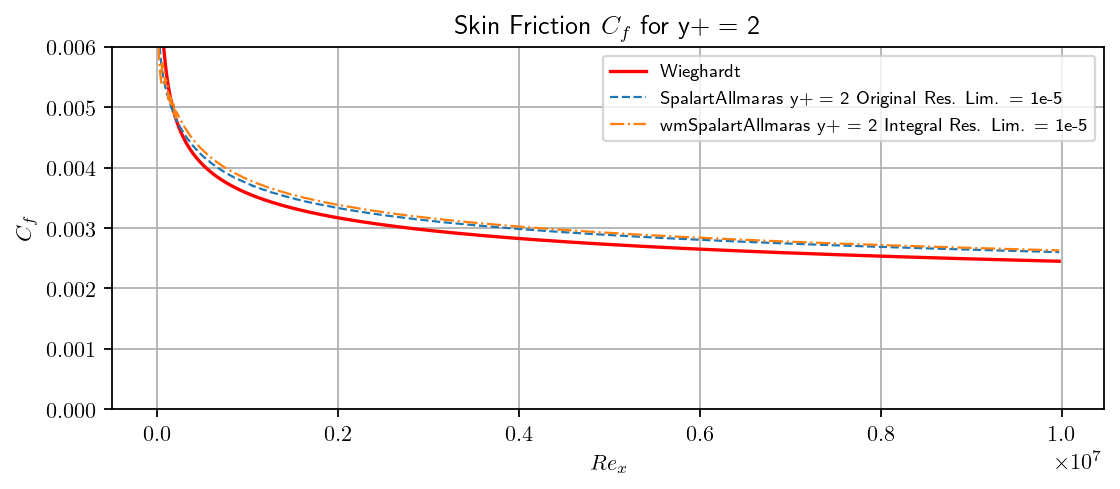

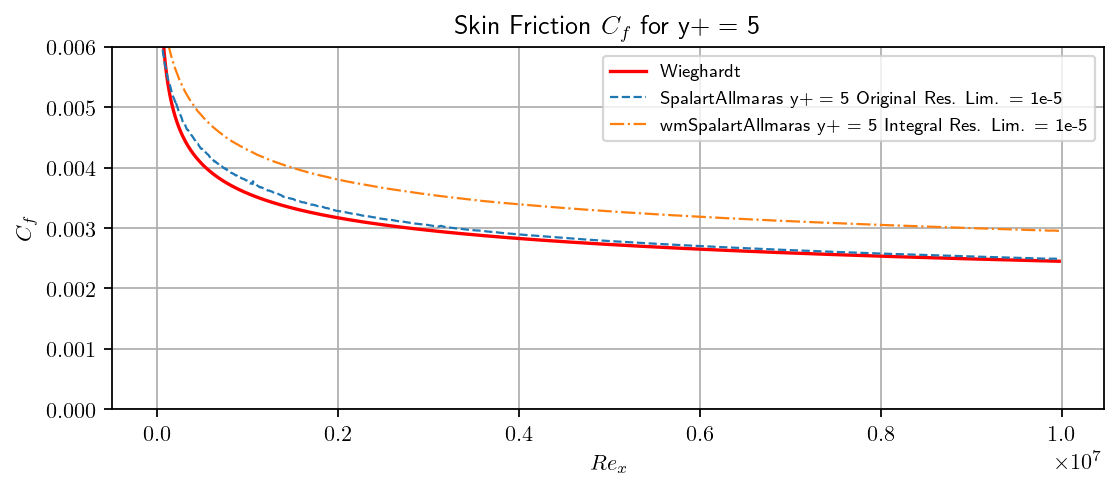

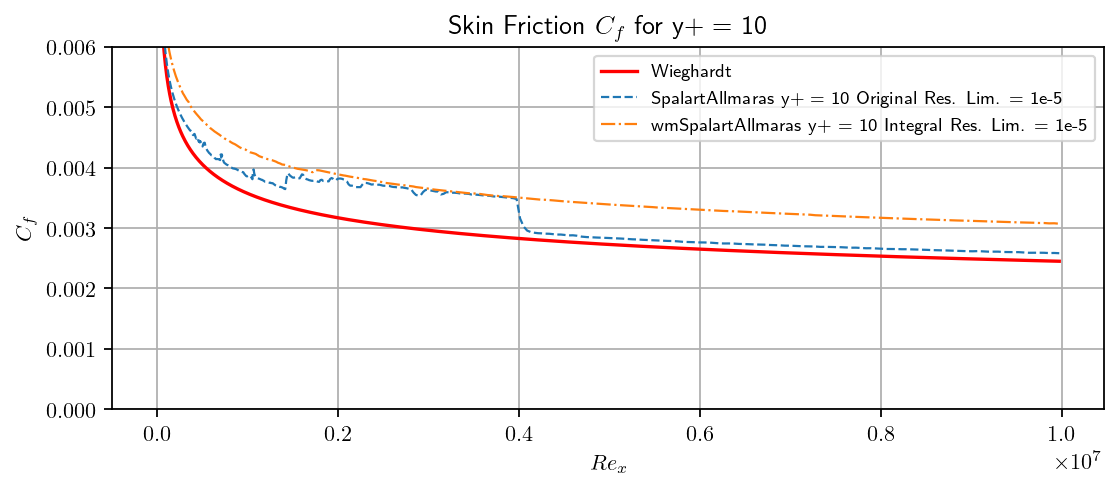

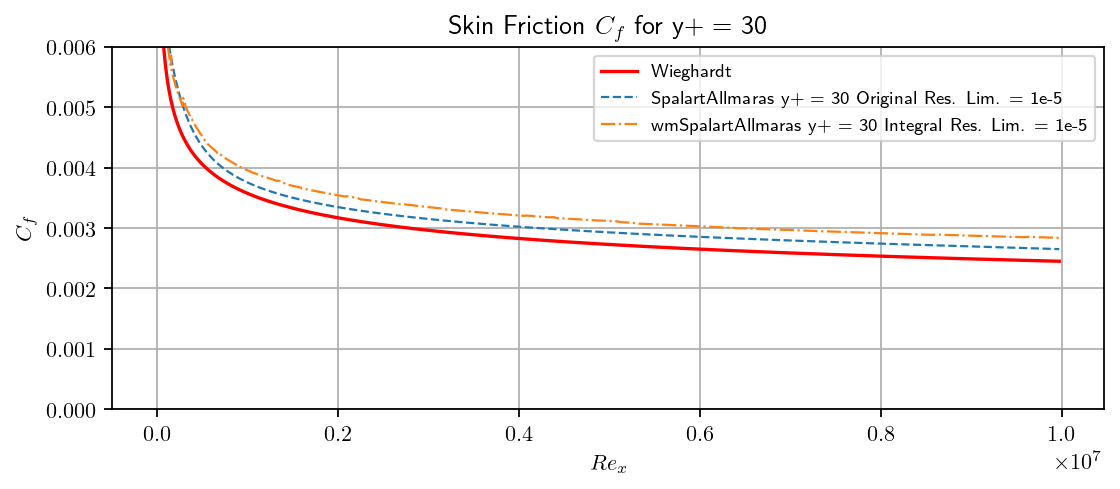

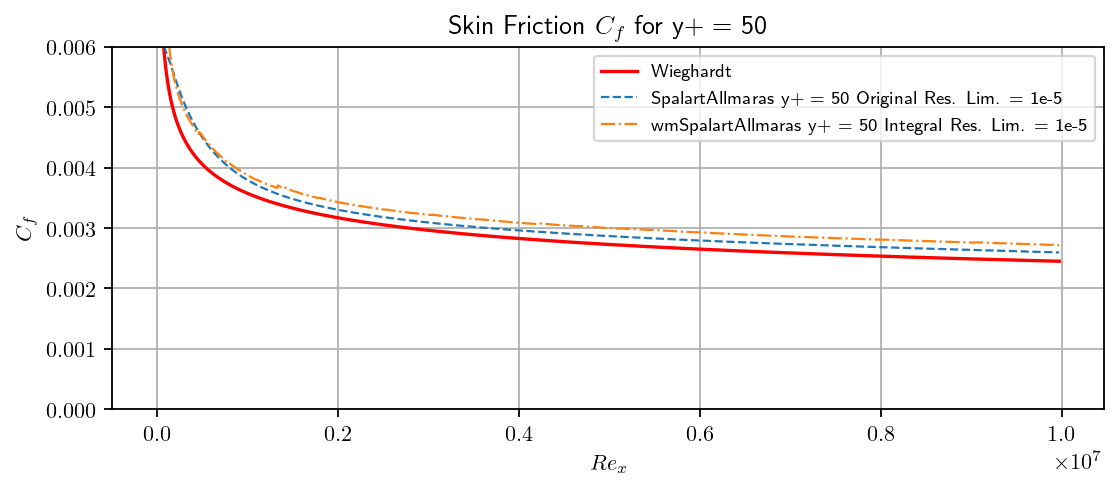

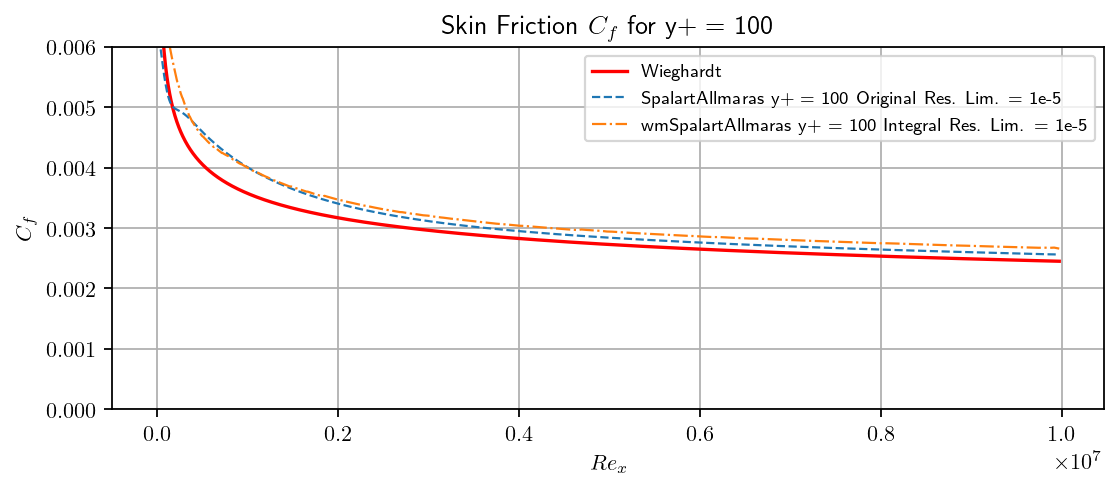

In [7]:
style = ["--", "-."]
lw = 1.0
for j in range(len(yp)):
    fig, ax = plt.subplots(1, 1, figsize=(8, 3))
    plt.ylim([0, 0.006])
    plt.grid()
    ax.set_xlabel(r"$Re_x$")
    ax.set_ylabel(r"$C_f$")
    plt.title(r"Skin Friction $C_f$ for y+ = {}".format(yp[j]))
    ax.plot(Rex, wieghardt, color = "r", label = "Wieghardt")    
    for i in range(len(res_list)):
        ax.plot(Rex, Cf[i + len(res_list)*j], label = "{} y+ = {} Original Res. Lim. = 1e-5".format(model_sa, yp[j]), ls = style[i], c = "C{:d}".format(i), lw = lw)
        ax.plot(Rex, Cf_sa[i + len(res_list)*j], label = "{} y+ = {} Integral Res. Lim. = 1e-5".format(model_wmsa, yp[j]), ls = style[i+1], c = "C{:d}".format(i+1), lw = lw)
        ax.legend(fontsize = 8)

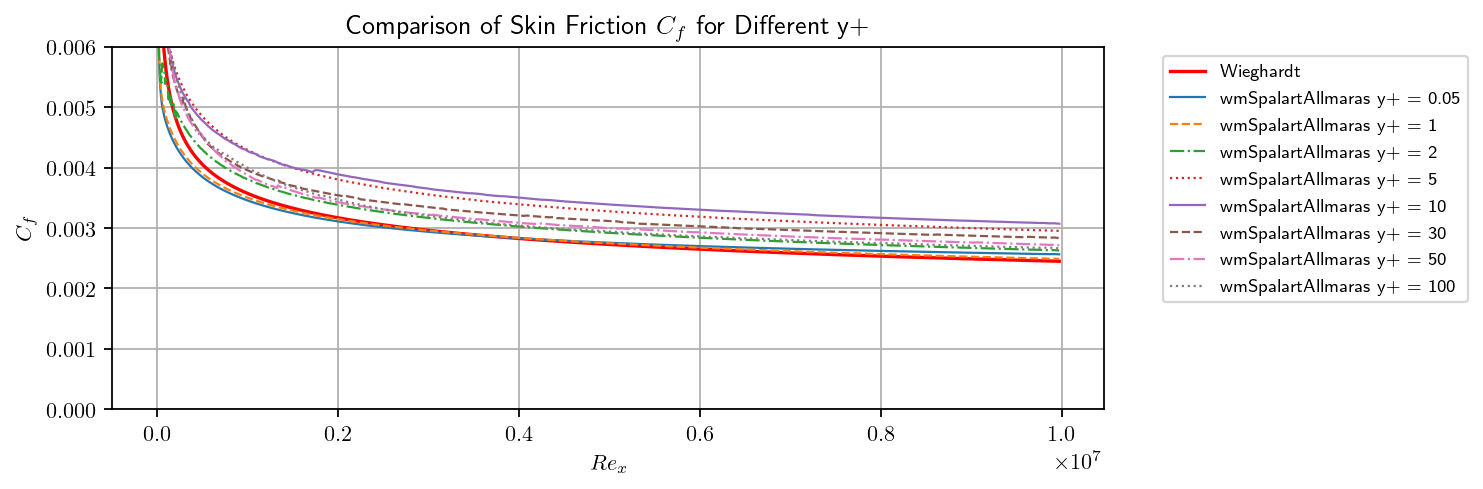

In [8]:
style2 = ["-", "--", "-.", ":", "-", "--", "-.", ":"]
lw2 = 1.0

fig2, ax2 = plt.subplots(1, 1, figsize=(8, 3))
plt.ylim([0, 0.006])
plt.grid()
ax2.set_xlabel(r"$Re_x$")
ax2.set_ylabel(r"$C_f$")
plt.title(r"Comparison of Skin Friction $C_f$ for Different y+")
ax2.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
for j in range(len(yp)):
    for i in range(len(res_list)):
        ax2.plot(Rex, Cf_sa[i + len(res_list)*j], label = "{} y+ = {}".format(model_wmsa, yp[j]), ls = style2[j], c = "C{:d}".format(j), lw = lw2)
        ax2.legend(fontsize = 8, bbox_to_anchor=(1.05, 1))